**Lab assignment 1**

Notebook focused on how to implement and test additional heuristics, as well as on comparing heuristics.

This is the main notebook on which to develop and validate the additional heuristic functions requested for this lab assignment.

In [1]:
# pip install matplotlib tabulate numpy

In [2]:
import search
from search import *

**Method implementing an additional heuristic**

In [9]:
# New heuristic to be tested: 2 * Manhattan distance
def misplacedTiles(state, end_state):
    """
    Heuristic that returns the number of misplaced tiles
    """
    misplaced = 0

    for i in range(len(state)):
        if state[i] != end_state[i] and state[i] != 0:
            misplaced += 1
    
    return misplaced

**Methods to simplify the execution of the algorithms available**

Let's include the new heuristic

In [4]:
# Auxiliary methods to execute the algorithms

def run_algorithm(algorithm_name, initial_state, end_state, size, depth=50, heuristic_func=None):
    """
    Executes the algorithm specified by its name and returns its results.
    Returns:
        dict: Dictionary with the results of the algorithm, or None if an error occurs
    """
    solution_data = None

    if algorithm_name == 'BFS':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, lambda s, es: 0, size)
        print("BFS executed")

    elif algorithm_name == 'DFS (Graph Search)':
        solution_data = graphSearch(initial_state, end_state, lambda x: -1, lambda s, es: 0, size, maximum_depth=depth)
        print("DFS (Graph Search) executed")

    elif algorithm_name == 'DFS-B':
        results_dict, _ = DFS_B(initial_state, end_state, size=size, maximum_depth=depth)
        solution_data = results_dict
        print("DFS-B executed")

    elif algorithm_name == 'Voraz (Manhattan)':  # Greedy (Manhattan)
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 0, manhattan_h_search, size)
        print("Voraz (Manhattan) executed")

    elif algorithm_name == 'ID':
        solution_data = ID_B(initial_state, end_state, size=size)
        print("ID executed")

    elif algorithm_name == 'A* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, manhattan_h_search, size)
        print("A* (Manhattan) executed")

    elif algorithm_name == 'A (MD + LC)':
        md_lc_h_search = lambda s, es_local=end_state: get_md_plus_linear_conflict(s, es_local)
        solution_data = graphSearch(initial_state,end_state,  lambda x: 1, md_lc_h_search, size)
        print("A (Manhattan + Linear_conflict) executed")

    elif algorithm_name == 'IDA* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = IDA_B(initial_state, end_state, size, manhattan_h_search)
        print("IDA* (Manhattan) executed")

    ################################################################################################
    # we add the new heuristic
    ################################################################################################

    elif algorithm_name == 'Nueva Heurística':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: nueva_heuristica(s, end_state), size)
        print("Nueva heuristica executed")

    ################################################################################################


    else:
        print(f"Algorithm {algorithm_name} not found!")
        return None

    if solution_data:
        if not solution_data['path'] or len(solution_data['path']) == 0:
            print(f"No solution found for {algorithm_name}")
        return {algorithm_name: solution_data}
    else:
        print(f"No solution data returned for {algorithm_name}")
        return {algorithm_name: {}}  # Return empty dict for the algorithm


def run_all_algorithms(initial_state, end_state, size, depth = 50):
    """
    Executes all the algorithms defined and returns their results.
    Returns:
        dict: Dictionary with the results of all the algorithms executed
    """
    algorithms = [
        'BFS',
        'DFS-B',
        'Voraz (Manhattan)',  # Greedy (Manhattan)
        'ID',
        'A* (Manhattan)',
        'A (MD + LC)',
        'IDA* (Manhattan)',
        'Nueva Heurística',           ###   WE ADD THE LABEL FOR THE NEW HEURISTIC TO THE LIST
    ]

    results = {}
    seen_algos = set()
    for algo in algorithms:
        if algo not in seen_algos:
            seen_algos.add(algo)
            algo_result = run_algorithm(algo, initial_state, end_state, size, depth)
            if algo_result and algo in algo_result:
                results[algo] = algo_result[algo]

    return results


**Example with size 3**

We define the initial state and the goal state, we run all the algorithms available, and we display the results.

BFS executed
DFS-B executed
Voraz (Manhattan) executed
ID executed
A* (Manhattan) executed
A (Manhattan + Linear_conflict) executed
IDA* (Manhattan) executed
Nueva heuristica executed
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |    Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+=============+===================+==================+====================+
| BFS               |     22 |      22 | 0.470827    |            233687 |            86871 |             110729 |
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| DFS-B             |     38 |      40 | 1.99003     |           2028383 |          1301341 |                 41 |
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| Voraz (Ma

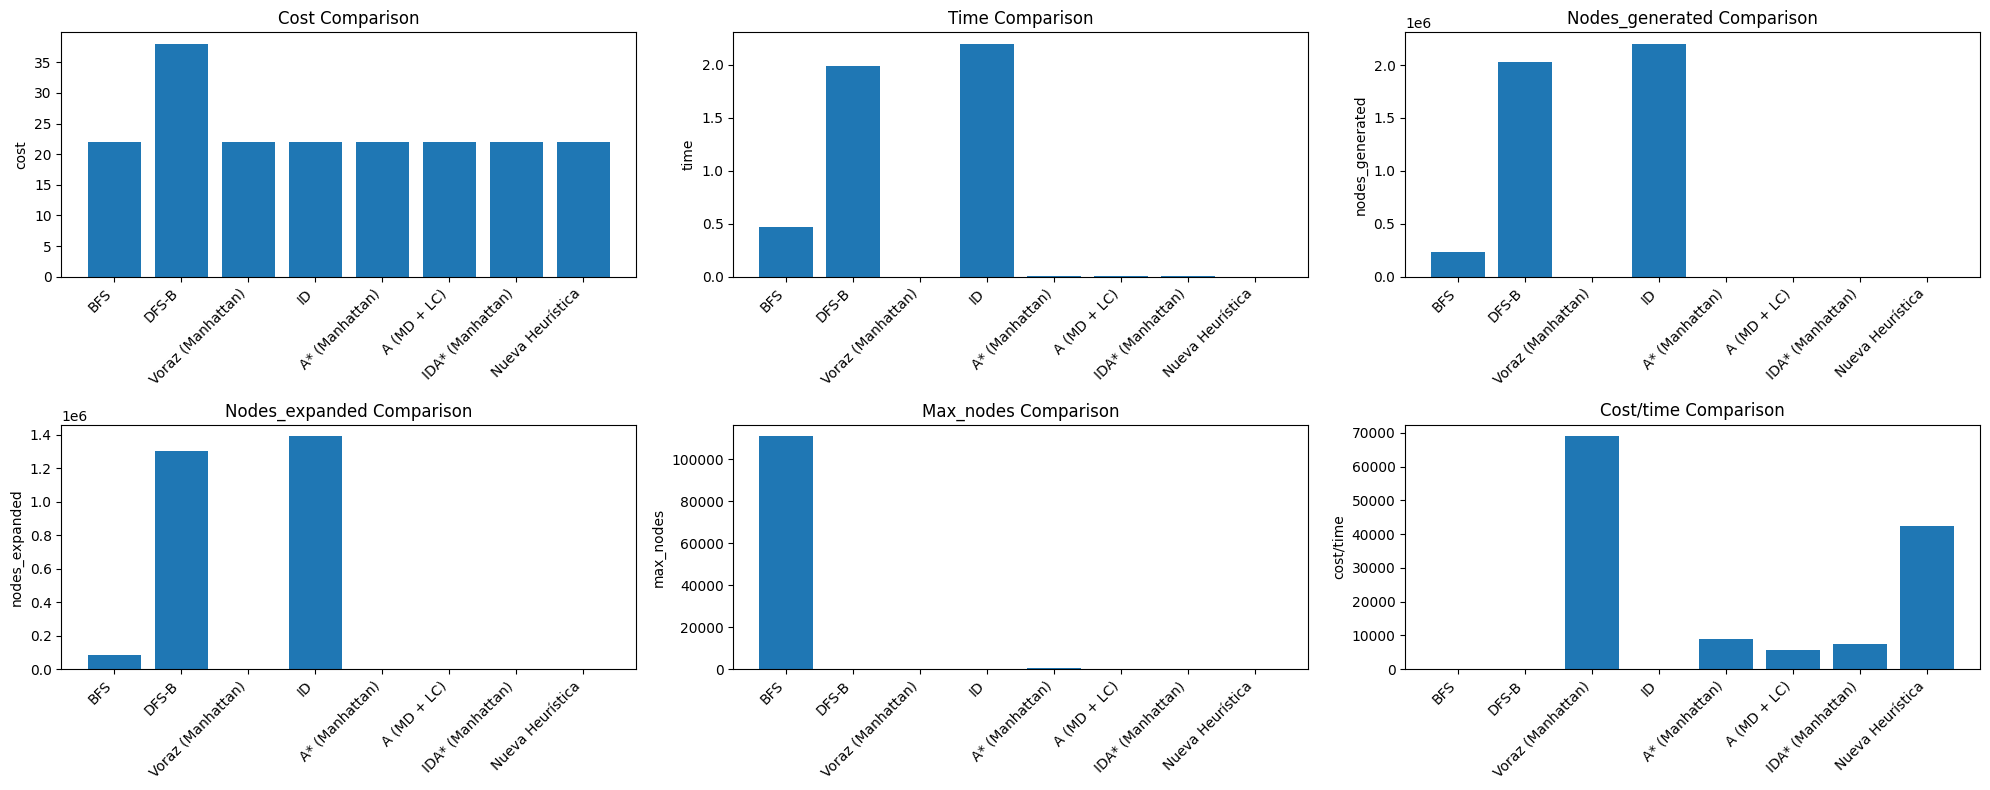

In [5]:
# Size 3

size = 3  # Example for a 3x3 puzzle

initial_state_matrix = [
    [7, 8, 1],
    [4, 0, 6],
    [2, 3, 5]
]


end_state_matrix = [
    [1, 2, 3],
    [8, 0, 4],
    [7, 6, 5]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run all of the algorithms and show the results as a table
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function that runs all the algorithms
    results = run_all_algorithms(initial_state, end_state, size, 40)
    show_results(results)
    plot_algorithm_comparison(results)
else:
    print("The puzzle is not solvable.")




**Question**

How does the new heuristic behave?  Is it A*?  Can you be sure about that?

**Reply:**

.


**Now try with size 4**

In [6]:
 # Size 4

size = 4
initial_state_matrix = [
    [13, 2, 10, 3],
    [1, 12, 8, 4],
    [5, 0, 9, 6],
    [15, 14, 11, 7]
]


end_state_matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 0]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run some specific algorithms, including the new heuristic
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function to run the algorithms
    algo_result = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Nueva Heurística', initial_state, end_state, size)
    results.update(algo_result)

    show_results(results)
else:
    print("The puzzle is not solvable.")


A* (Manhattan) executed
Voraz (Manhattan) executed
Nueva heuristica executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| A* (Manhattan)    |     41 |      41 |  4.62757   |            645273 |           215568 |             403054 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Voraz (Manhattan) |    111 |     111 |  0.0307093 |              4983 |             1594 |               3277 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Nueva Heurística  |     47 |      47 |  0.819257  |            121708 |            35397 |              72042 |
+----------

**Question**

What do you think now?

**Answer**

.

**Example with size 5**

In [7]:
# Size 5

size = 5
initial_state_matrix = [
  [1, 2, 3, 4, 5],
  [6, 7, 8, 9, 10],
  [0, 12, 13, 14, 15],
  [16, 17, 18, 19, 20],
  [21, 22, 24, 23, 11]
]

end_state_matrix = [
  [1, 2, 3, 4, 5],
  [6, 7, 8, 9, 10],
  [11, 12, 13, 14, 15],
  [16, 17, 18, 19, 20],
  [21, 22, 23, 24, 0]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Running a few specific algorithms
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function to run the algorithms
    algo_result = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Nueva Heurística', initial_state, end_state, size)
    results.update(algo_result)

    show_results(results)

else:
    print("The puzzle is not solvable.")



A* (Manhattan) executed
Voraz (Manhattan) executed
Nueva heuristica executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| A* (Manhattan)    |     30 |      30 |  2.10603   |            182180 |            55355 |             121598 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Voraz (Manhattan) |    138 |     138 |  0.0616488 |              5718 |             1688 |               3985 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Nueva Heurística  |     30 |      30 |  0.142085  |             13130 |             3871 |               8823 |
+----------

**Now try size n, auto-generating initial and goal states**

Here we consider how to generalize to n the size of the puzzle.

Initial state:

    8  2
 7  1  3
 6  5  4

End state:

 1  2  3
 4  5  6
 7  8   

Voraz (Manhattan) executed
A* (Manhattan) executed
A (Manhattan + Linear_conflict) executed
Nueva heuristica executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| Voraz (Manhattan) |     90 |      90 | 0.00493598 |              1239 |              449 |                761 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| A* (Manhattan)    |     20 |      20 | 0.0012939  |               371 |              138 |                233 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+


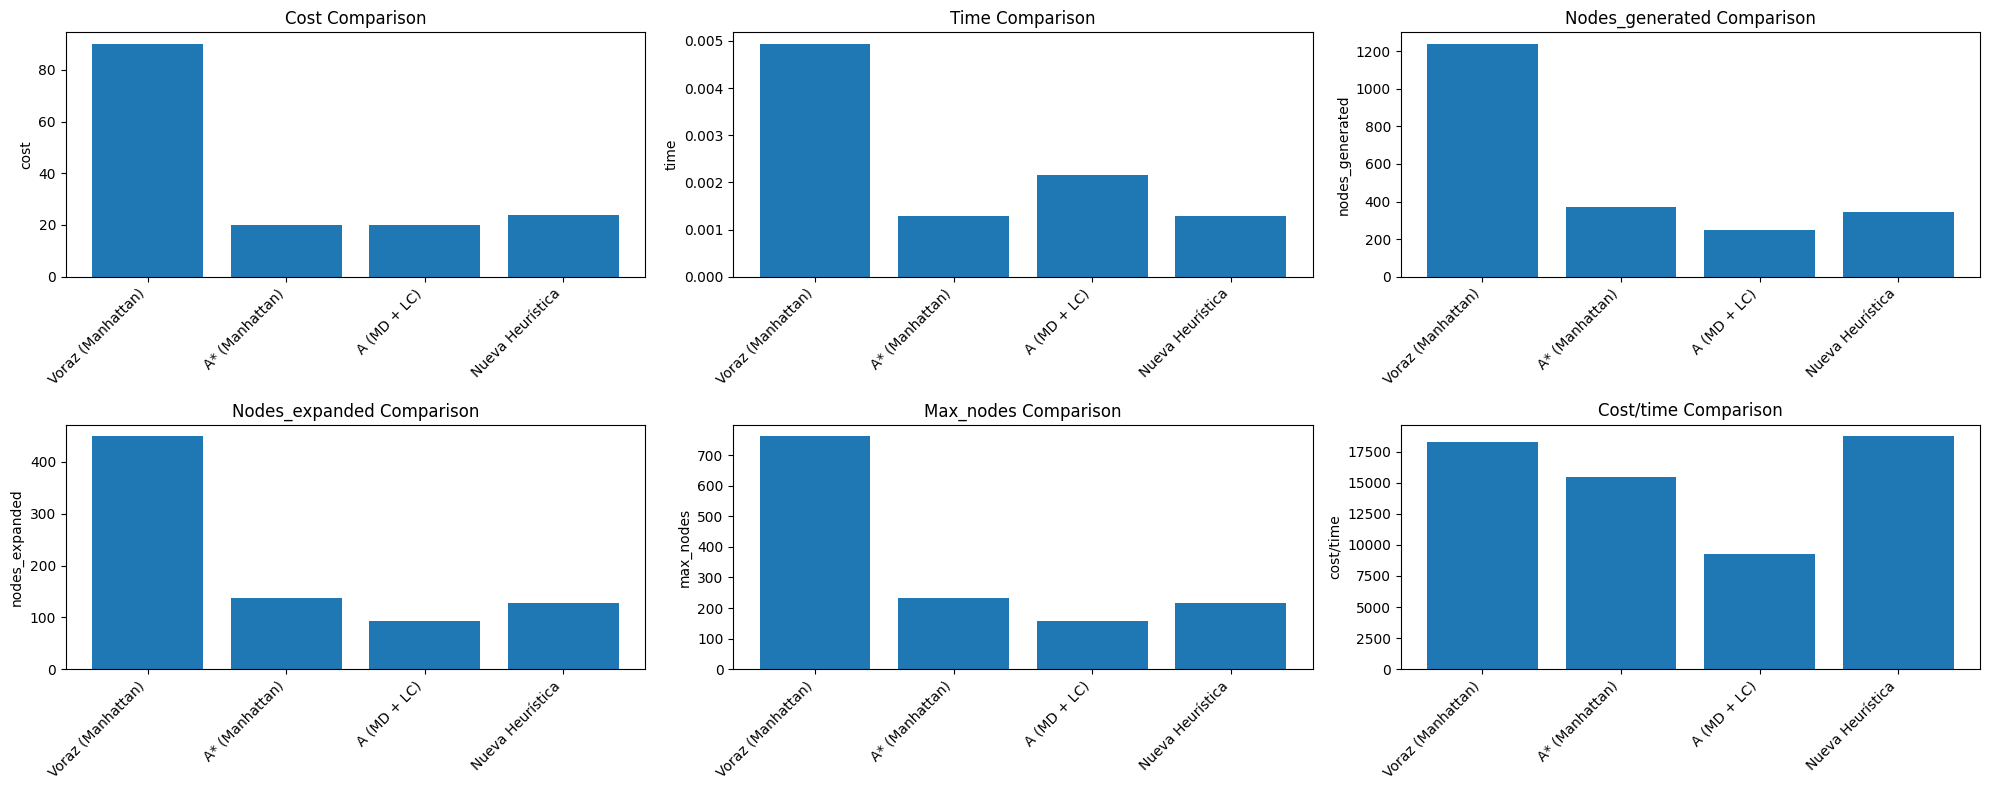

In [8]:
# Try with size n, auto-generating initial and goal states
size = 3
end_state = generate_ordered_state(size)
#end_state = generate_spiral_state(size)
initial_state = generate_random_state(size, end_state)


print("Initial state:\n")
visualize_state(initial_state)

print("\nEnd state:\n")
visualize_state(end_state)

# Running some specific algorithms
results = {}

print()
alg_results = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)
results.update(alg_results)
alg_results = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
results.update(alg_results)
alg_results = run_algorithm('A (MD + LC)', initial_state, end_state, size)
results.update(alg_results)
algo_result = run_algorithm('Nueva Heurística', initial_state, end_state, size)
results.update(algo_result)

show_results(results)
plot_algorithm_comparison(results)

#show_path_for_algorithm(results, 'A (MD + LC)', size)